In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

from tsn_analyzer import tsn_analyzer
from network_gen import *

In [2]:
# Define common parameter
burst = 1           # [kb]
latency = 0.001     # [s]
ser_rate = 10000    # [kb/s]
pkt_leng = 0        # [kb]
eta = 1
capacity = eta*ser_rate # [kb/s]
dummy = 1

# initialize analyzer
analyzer = tsn_analyzer()

Fig. 16(a) Reproduce
------------------
Delay vs. # of servers for interleaved tandem

In [3]:
num_servers = np.arange(1, 26)
utility = 0.5

# container of answer
tfa_total_delays = [0]*len(num_servers)
tfa_pp_total_delays = [0]*len(num_servers)

In [4]:
# simulate all possible server numbers
for i, ser_num in enumerate(tqdm(num_servers)):
    # Generate network
    network = generate_interleaved_tandem(size=ser_num,
                                          burst=burst,
                                          arr_rate=dummy,
                                          pkt_leng=pkt_leng,
                                          latency=latency,
                                          ser_rate=ser_rate,
                                          capacity=capacity)
    
    analyzer.parse(network) # parse the network object
    analyzer.set_utility(utility)

    # solve TFA problem
    tfa_delay = analyzer.solve_tfa(f"{ser_num}-server interleave TFA")
    tfa_total_delays[i] = sum(tfa_delay)

    # solve TFA++ problem
    tfa_pp_delay = analyzer.solve_tfa_pp(f"{ser_num}-server interleave TFA++")
    tfa_pp_total_delays[i] = sum(tfa_pp_delay)


100%|██████████| 25/25 [00:01<00:00, 13.82it/s]


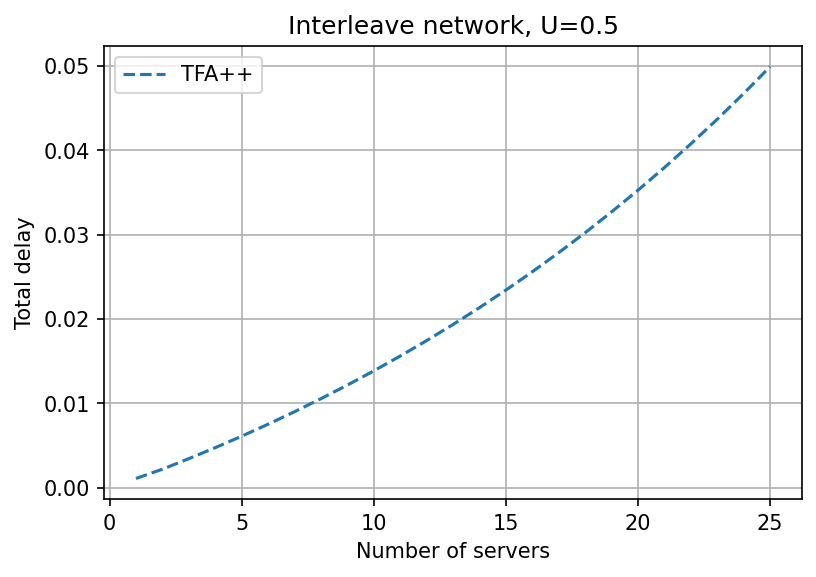

In [5]:
# Plot using matplot
plt.figure(dpi=150)
# plt.plot(num_servers, tfa_total_delays, '-', label="TFA")
plt.plot(num_servers, tfa_pp_total_delays, '--', label="TFA++")
plt.title("Interleave network, U=0.5")
plt.xlabel("Number of servers")
plt.ylabel("Total delay")
plt.legend()
plt.grid()
plt.show()

Fig. 17(a) Reproduce
------------------
Delay vs. network load for interleaved tandem

In [6]:
num_servers = 10
utility = np.arange(0.05, 1.0, 0.05)

# container of answer
tfa_total_delays = [0]*len(utility)
tfa_pp_total_delays = [0]*len(utility)

In [7]:
# simulate all possible server numbers
for i, util in enumerate(tqdm(utility)):
    # Generate network
    network = generate_interleaved_tandem(size=num_servers,
                                          burst=burst,
                                          arr_rate=dummy,
                                          pkt_leng=pkt_leng,
                                          latency=latency,
                                          ser_rate=ser_rate,
                                          capacity=capacity)
    
    analyzer.parse(network) # parse the network object
    analyzer.set_utility(util)

    # solve TFA problem
    tfa_delay = analyzer.solve_tfa(f"{util}-loaded interleave TFA")
    tfa_total_delays[i] = sum(tfa_delay)

    # solve TFA++ problem
    tfa_pp_delay = analyzer.solve_tfa_pp(f"{util}-loaded interleave TFA++")
    tfa_pp_total_delays[i] = sum(tfa_pp_delay)


100%|██████████| 19/19 [00:01<00:00, 15.57it/s]


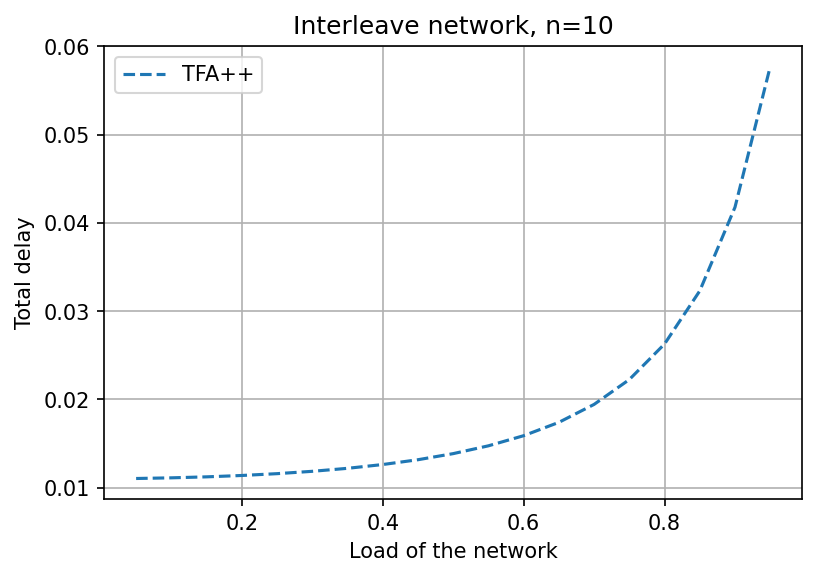

In [8]:
# Plot using matplot
plt.figure(dpi=150)
# plt.plot(utility, tfa_total_delays, '-', label="TFA")
plt.plot(utility, tfa_pp_total_delays, '--', label="TFA++")
plt.title(f"Interleave network, n={num_servers}")
plt.xlabel("Load of the network")
plt.ylabel("Total delay")
plt.legend()
plt.grid()
plt.show()

Fig. 26(a) Reproduce
------------------
Delay vs. # of servers for ring network

In [9]:
num_servers = np.arange(2, 11)
utility = 0.5

# container of answer
tfa_total_delays = [0]*len(num_servers)
tfa_pp_total_delays = [0]*len(num_servers)

In [10]:
# simulate all possible server numbers
for i, ser_num in enumerate(tqdm(num_servers)):
    # Generate network
    network = generate_ring(size=ser_num,
                            burst=burst,
                            arr_rate=dummy,
                            pkt_leng=pkt_leng,
                            latency=latency,
                            ser_rate=ser_rate,
                            capacity=capacity)
    
    analyzer.parse(network) # parse the network object
    analyzer.set_utility(utility)

    # solve TFA problem
    # tfa_delay = analyzer.solve_tfa(f"{ser_num}-server interleave TFA")
    # tfa_total_delays[i] = sum(tfa_delay)

    # solve TFA++ problem
    tfa_pp_delay = analyzer.solve_tfa_pp(f"{ser_num}-server ring TFA++")
    tfa_pp_total_delays[i] = sum(tfa_pp_delay)


100%|██████████| 9/9 [00:00<00:00, 29.55it/s]


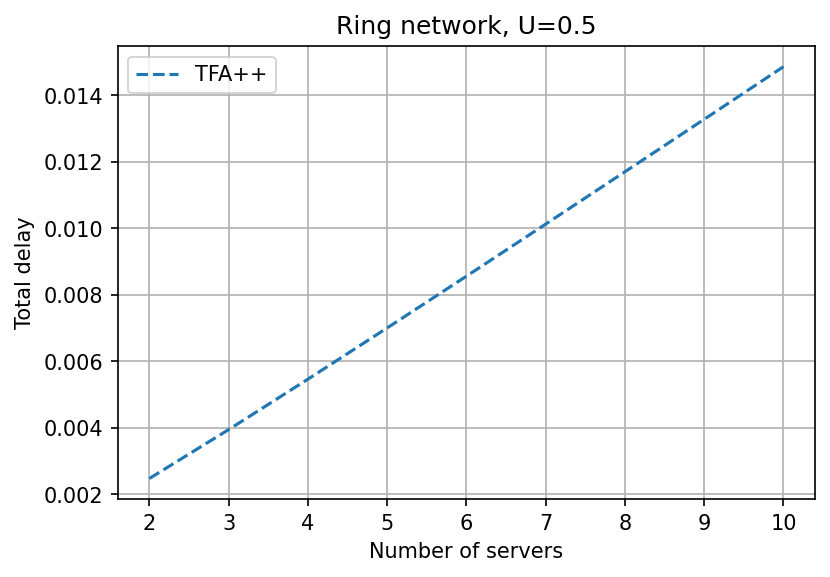

In [11]:
# Plot using matplot
plt.figure(dpi=150)
# plt.plot(num_servers, tfa_total_delays, '-', label="TFA")
plt.plot(num_servers, tfa_pp_total_delays, '--', label="TFA++")
plt.title("Ring network, U=0.5")
plt.xlabel("Number of servers")
plt.ylabel("Total delay")
plt.legend()
plt.grid()
plt.show()

Fig. 26(a) Reproduce
------------------
Delay vs. network load for ring network

In [12]:
num_servers = 7
utility = np.arange(0.05, 1.0, 0.05)

# container of answer
tfa_total_delays = [0]*len(utility)
tfa_pp_total_delays = [0]*len(utility)

In [13]:
# simulate all possible server numbers
for i, util in enumerate(tqdm(utility)):
    # Generate network
    network = generate_ring(size=num_servers,
                            burst=burst,
                            arr_rate=dummy,
                            pkt_leng=pkt_leng,
                            latency=latency,
                            ser_rate=ser_rate,
                            capacity=capacity)
    
    analyzer.parse(network) # parse the network object
    analyzer.set_utility(util)

    # solve TFA problem
    # tfa_delay = analyzer.solve_tfa(f"{util}-loaded interleave TFA")
    # tfa_total_delays[i] = sum(tfa_delay)

    # solve TFA++ problem
    tfa_pp_delay = analyzer.solve_tfa_pp(f"{util:.2f}-loaded interleave TFA++")
    tfa_pp_total_delays[i] = sum(tfa_pp_delay)


100%|██████████| 19/19 [00:00<00:00, 20.18it/s]

Problem "0.85-loaded interleave TFA++" is Undefined.
Problem "0.90-loaded interleave TFA++" is Undefined.
Problem "0.95-loaded interleave TFA++" is Undefined.


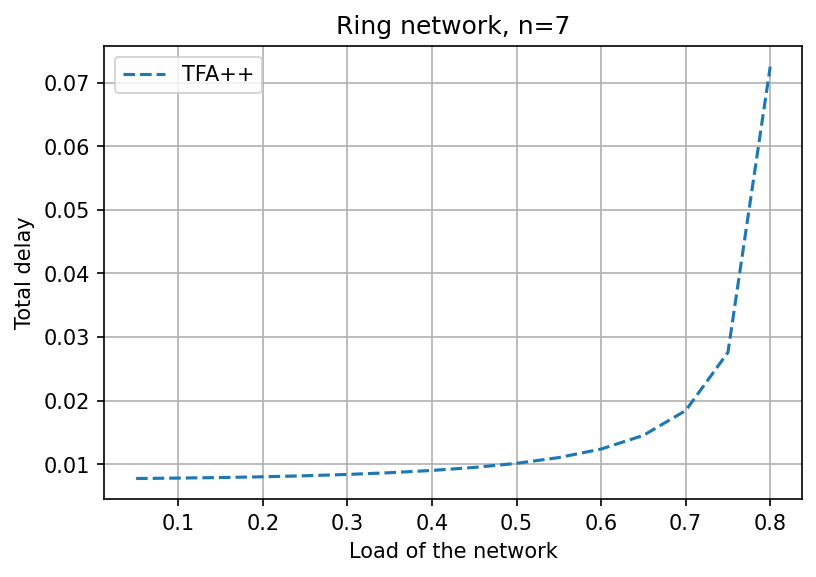

In [14]:
# Plot using matplot
plt.figure(dpi=150)
# plt.plot(utility, tfa_total_delays, '-', label="TFA")
plt.plot(utility, tfa_pp_total_delays, '--', label="TFA++")
plt.title(f"Ring network, n={num_servers}")
plt.xlabel("Load of the network")
plt.ylabel("Total delay")
plt.legend()
plt.grid()
plt.show()